# House Price Prediction

In [28]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# read dataset 
dataset = pd.read_csv("./dataset/data.csv" , index_col=False)

In [3]:
dataset = dataset.reset_index(drop=True)


### Show dataset info and details

In [4]:
dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
dataset.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Data visualization 

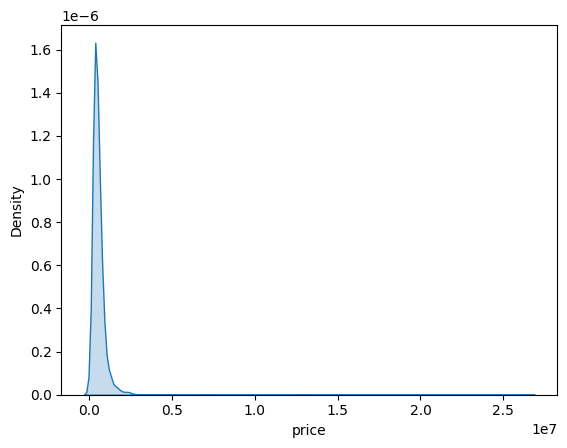

In [7]:
sns.kdeplot(data=dataset,x="price" , fill=True)
plt.show()

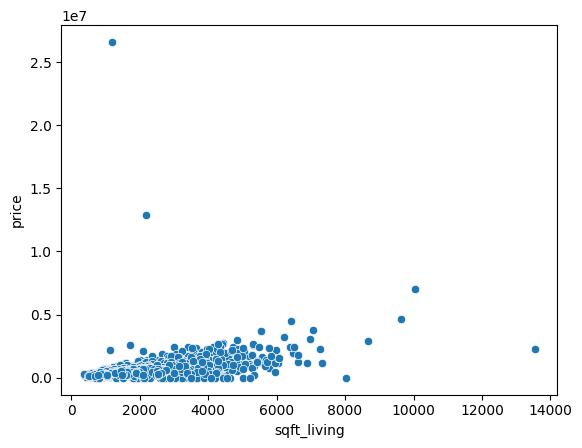

In [8]:
sns.scatterplot(data=dataset, x="sqft_living", y="price")
plt.show()

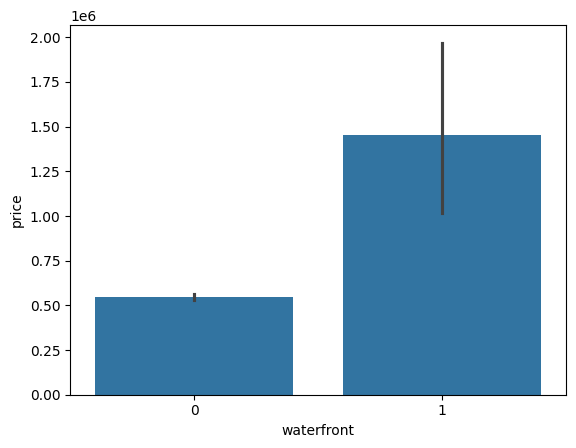

In [9]:
sns.barplot(data=dataset, x="waterfront", y="price")
plt.show()

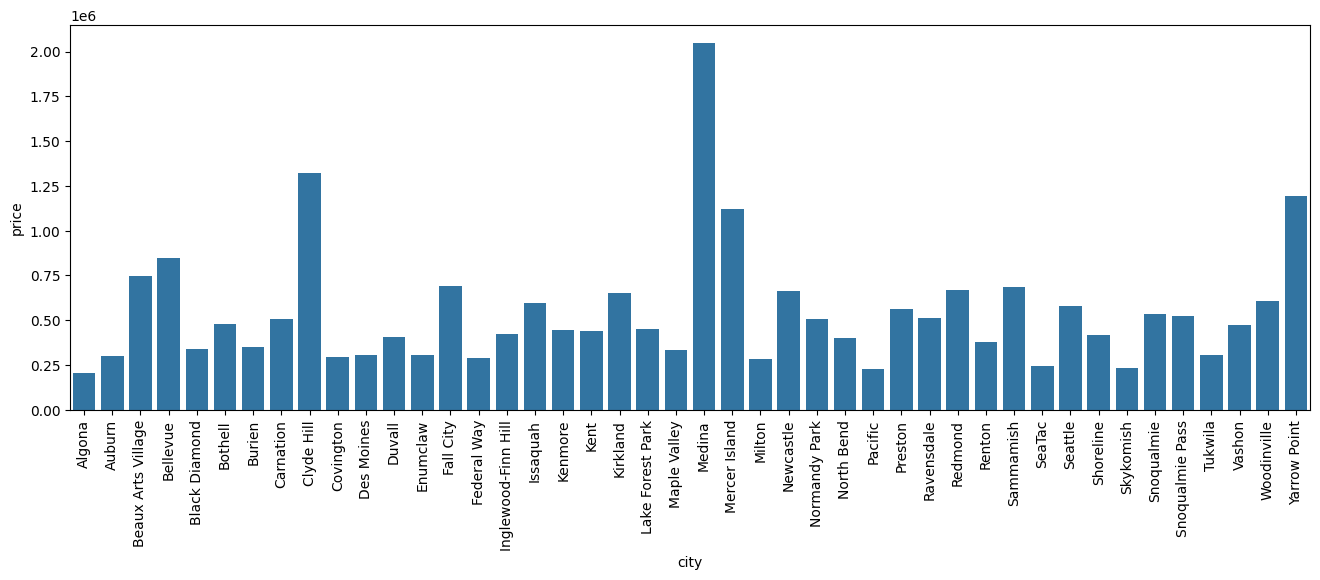

In [10]:
city_price = dataset.groupby("city")["price"].mean().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(data=city_price, x="city", y="price")
plt.xticks(rotation=90)
plt.show()


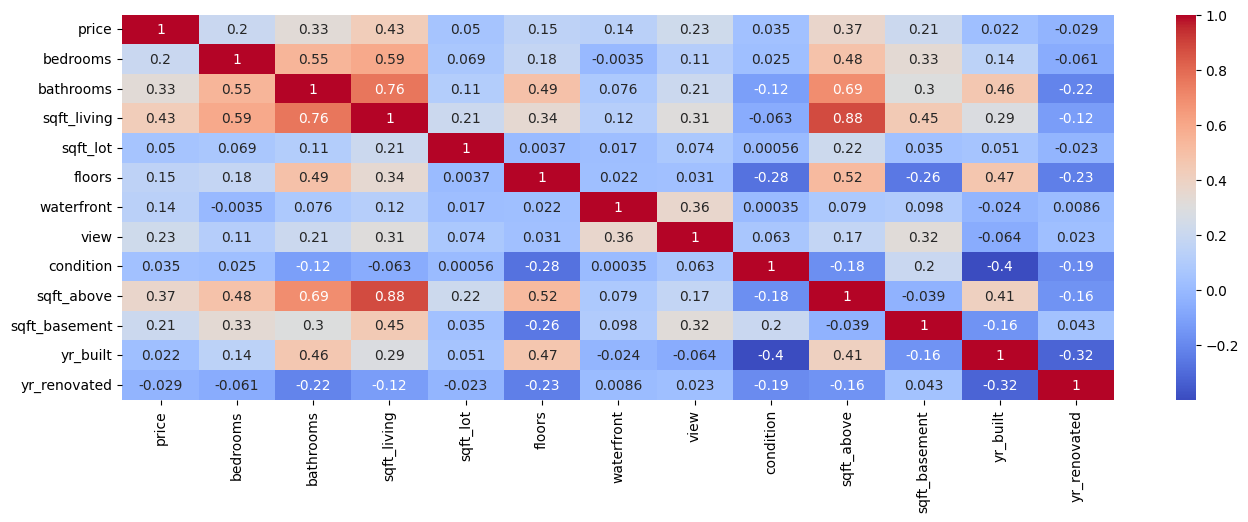

In [11]:
corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


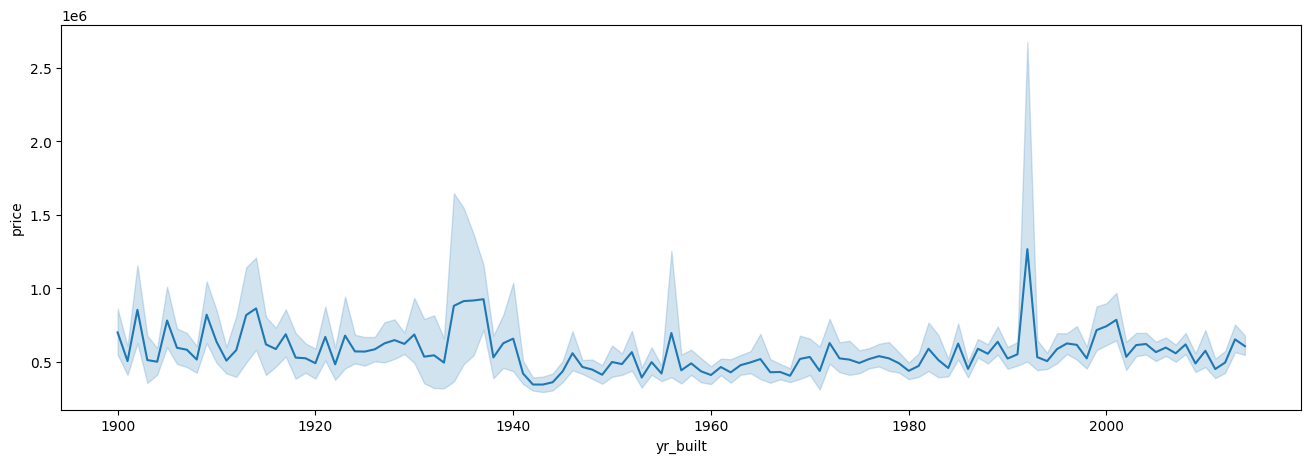

In [12]:
plt.figure(figsize=(16,5))
sns.lineplot(data=dataset, x="yr_built", y="price")
plt.show()


### Modify the location name or replace the location name with number

In [13]:
# make a function that replace the place name with number
city_map = {city:idx for idx,city in enumerate(dataset["city"].unique()) }
dataset["city"]= dataset["city"].map(city_map)

In [81]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,0,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,1,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,2,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,4,WA 98052,USA


In [124]:
# divides data
X = dataset.drop(columns=["price","country","street","statezip","date","yr_renovated","view"])
Y = dataset["price"]

In [125]:
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0          3.0       1.50         1340      7912     1.5           0   
1          5.0       2.50         3650      9050     2.0           0   
2          3.0       2.00         1930     11947     1.0           0   
3          3.0       2.25         2000      8030     1.0           0   
4          4.0       2.50         1940     10500     1.0           0   
...        ...        ...          ...       ...     ...         ...   
4595       3.0       1.75         1510      6360     1.0           0   
4596       3.0       2.50         1460      7573     2.0           0   
4597       3.0       2.50         3010      7014     2.0           0   
4598       4.0       2.00         2090      6630     1.0           0   
4599       3.0       2.50         1490      8102     2.0           0   

      condition  sqft_above  sqft_basement  yr_built  city  
0             3        1340              0      1955     0  
1            

## SPLIT DATASET INTO TRAIN AND TEST

In [134]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.2 ,random_state=42,)

In [135]:

print(X_train.head())
print(Y_train.head())

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1898       4.0       2.50         2770     45514     2.0           0   
1370       4.0       3.00         3720     29043     2.0           0   
3038       4.0       2.50         2810     11120     2.0           0   
2361       4.0       3.75         4030     10800     2.0           0   
156        3.0       2.00         2000      7000     2.0           0   

      condition  sqft_above  sqft_basement  yr_built  city  
1898          4        2770              0      1989    15  
1370          3        3720              0      1991    13  
3038          3        2810              0      1982     8  
2361          3        4030              0      2006    13  
156           3        2000              0      1916     1  
1898     685000.0
1370     857000.0
3038     675000.0
2361    1485000.0
156      561000.0
Name: price, dtype: float64


## Train model

In [136]:
model = LinearRegression()

In [137]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# predict train dataset and test dataset 

In [138]:
X_train_predict = model.predict(X_train)

In [139]:
X_test_predict = model.predict(X_test)

## get accuracy of train dataset and train dataset

In [140]:
# train dataset
train_data_accuracy_score = r2_score(Y_train,X_train_predict)
print("Train data accuracy score:",train_data_accuracy_score)

Train data accuracy score: 0.5423465316660698


In [141]:
# test dataset 
test_data_accuracy_score = r2_score(Y_test,X_test_predict)
print("Train data accuracy score:",test_data_accuracy_score)

Train data accuracy score: 0.034154069093467965
